# A group project California--Median Home Price Forecast

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
original_directory = os.getcwd()
original_directory
# os.chdir(original_directory)

'/Users/fulin/Documents/GitHub/Python_Project_Group_09'

Select a PATH pointing to your working directory - where your datasets are saved

In [3]:
PATH = './data'

Then use the \<os> module to change your current (default) working directory to PATH, your new working directory

In [4]:
os.chdir(PATH)

**Import the \<California_Houses.csv> dataset from your working directory**

In [5]:
df = pd.read_csv('California_Houses.csv')

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [6]:
display(df.head(5))
display(df.tail(5))

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [7]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

*Hint : you may wish to associate the name of each city to the smallest distance among the four cities*

Save the transformed dataset as "housing"

In [8]:
# A function to find the nearest city and return the column name
def find_nearest_destination(row):
    distances = row[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
    nearest_destination = distances.idxmin()
    return nearest_destination

#A new column is created to get the column name, which stores both the name of the nearest city.
df['Closest_city'] = df.apply(find_nearest_destination, axis=1)

# Harmonize representations, remove prefixes
df['Closest_city'] = df['Closest_city'].str.replace('Distance_to_', '').astype('category')

# df['Closest_city'].unique()

df.drop(columns = ['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace = True)

In [9]:
# Deep copy dataframe
housing = df.copy(deep = True)

**Display the summary of your new dataframe**

In [10]:
display(housing.describe())
display(housing.info())

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  category
dtypes: category(1), float64(5), int64(5)
memory usage: 1.6 MB


None

# Part 1 - Data explorations

### What do you notice? 

- which attributes are quantitative ?
- which attributes are not quantitative? and what are their types?

`Quantitative` : Median_House_Value, Median_Income, Median_Age, Tot_Rooms, Tot_Bedrooms, Population, Households, Latitude, Longitude, Distance_to_coast

`Categorical` : Closest_city

### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [11]:
housing['Closest_city'] = housing['Closest_city'].astype('category')

In [12]:
display(housing['Closest_city'].value_counts())

LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: Closest_city, dtype: int64

### Show a summary of the quantitative attributes
**Use tables and plots**

In [13]:
housing_num = housing.select_dtypes(include=['number'])
housing_cat = housing.select_dtypes(exclude=['number'])

In [14]:
housing_num.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371


In [15]:
def hist_box(col, bins):
    
    fig, ax = plt.subplots(1,2, figsize = (8,4), facecolor='white', dpi=100)
    
    #ax1
    sns.histplot(data=col, kde=True, bins=bins, color='skyblue', edgecolor='black', ax=ax[0])
    ax[0].set_title(f'Histogramme of {col.name}')
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel('Count')
    
    #ax2
    sns.boxplot(data = col, color='skyblue', ax=ax[1])
    # boxplot = ax[1].boxplot(col, vert=True, patch_artist=True, boxprops={'facecolor': 'lightcoral'})
    #Find outliers
    # outliers = [flier.get_ydata() for flier in boxplot['fliers']]
    # for outlier in outliers:
    #     for value in outlier:
    #         ax[1].annotate(str(value), (1, value), textcoords='offset points', xytext=(10, 0), va='center', fontsize=8, color='red')
    ax[1].set_title(f'Boxplot of {col.name}')
    ax[1].set_xlabel(col.name.upper())
    
    plt.tight_layout()
    plt.show()

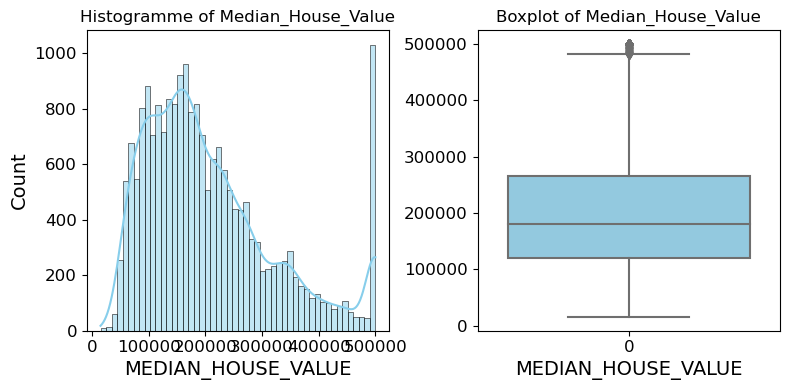

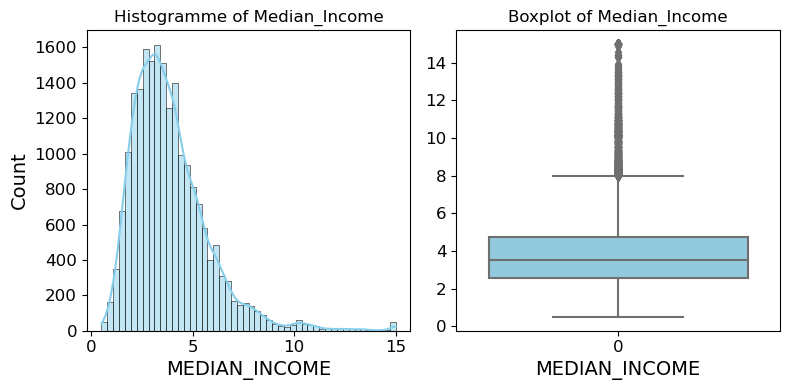

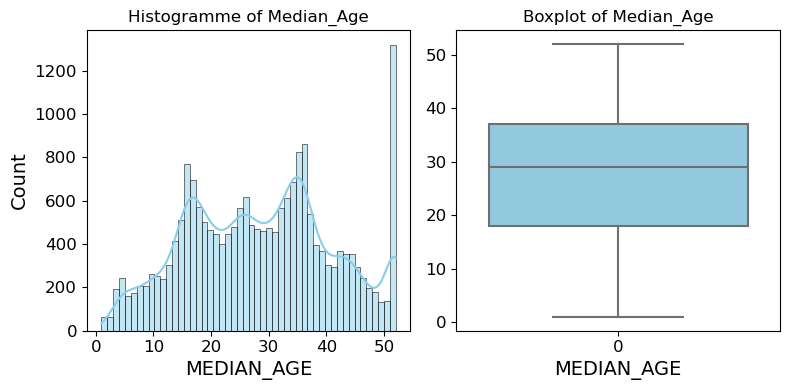

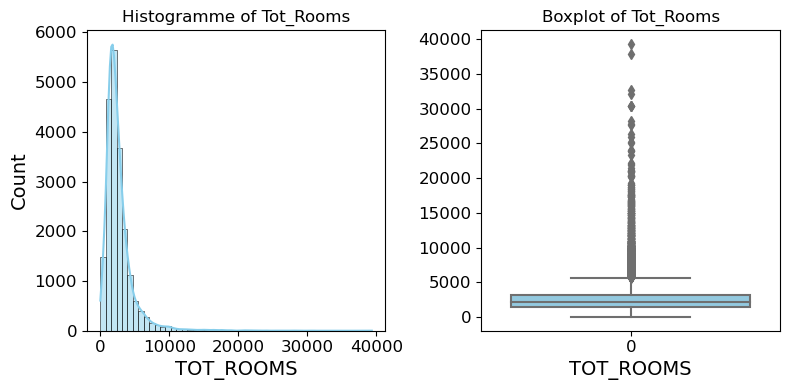

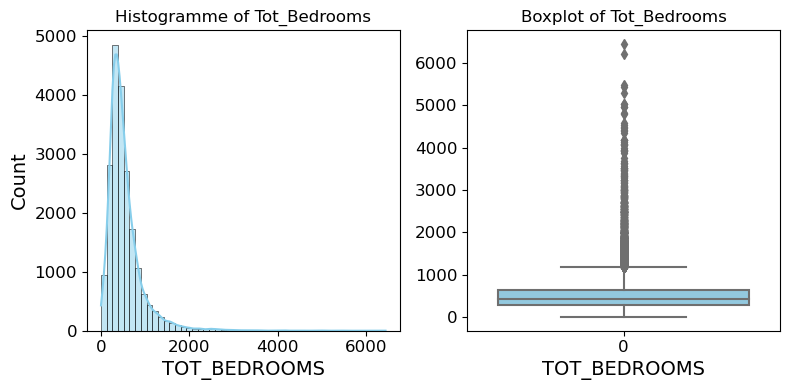

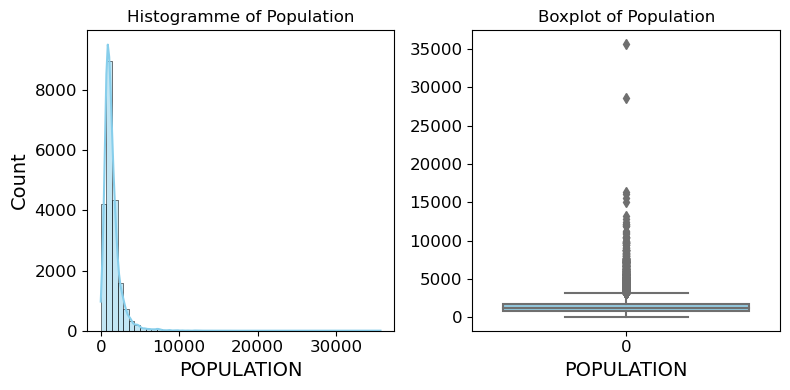

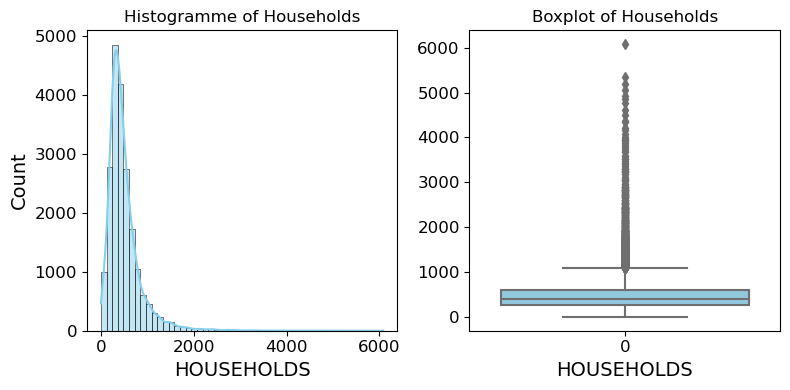

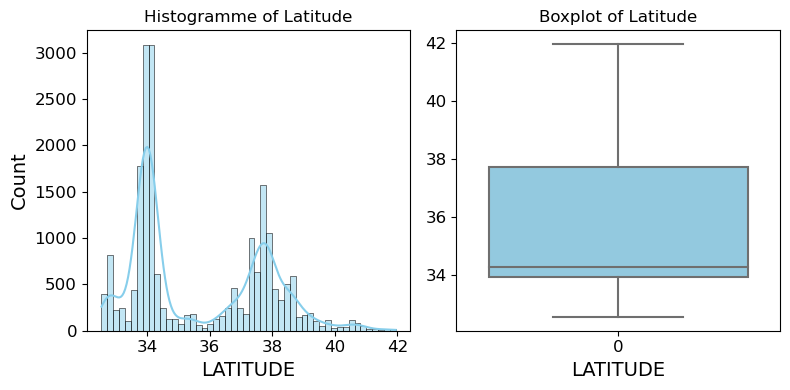

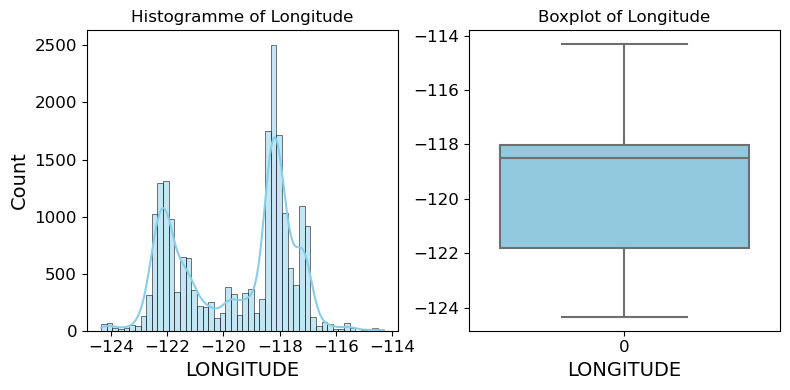

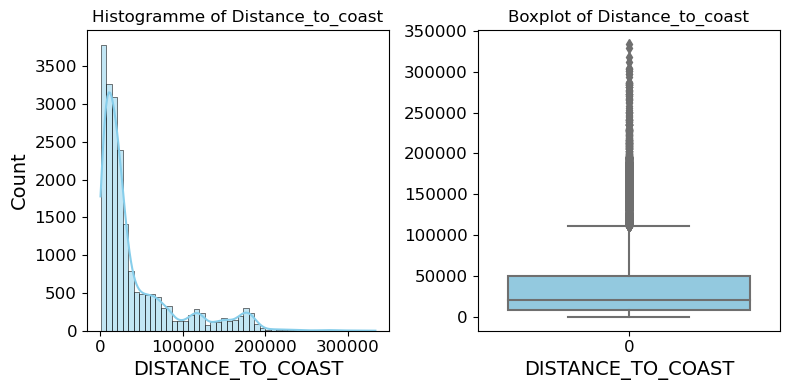

In [16]:
for i in housing_num.columns:
    hist_box(housing[i], bins = 50)

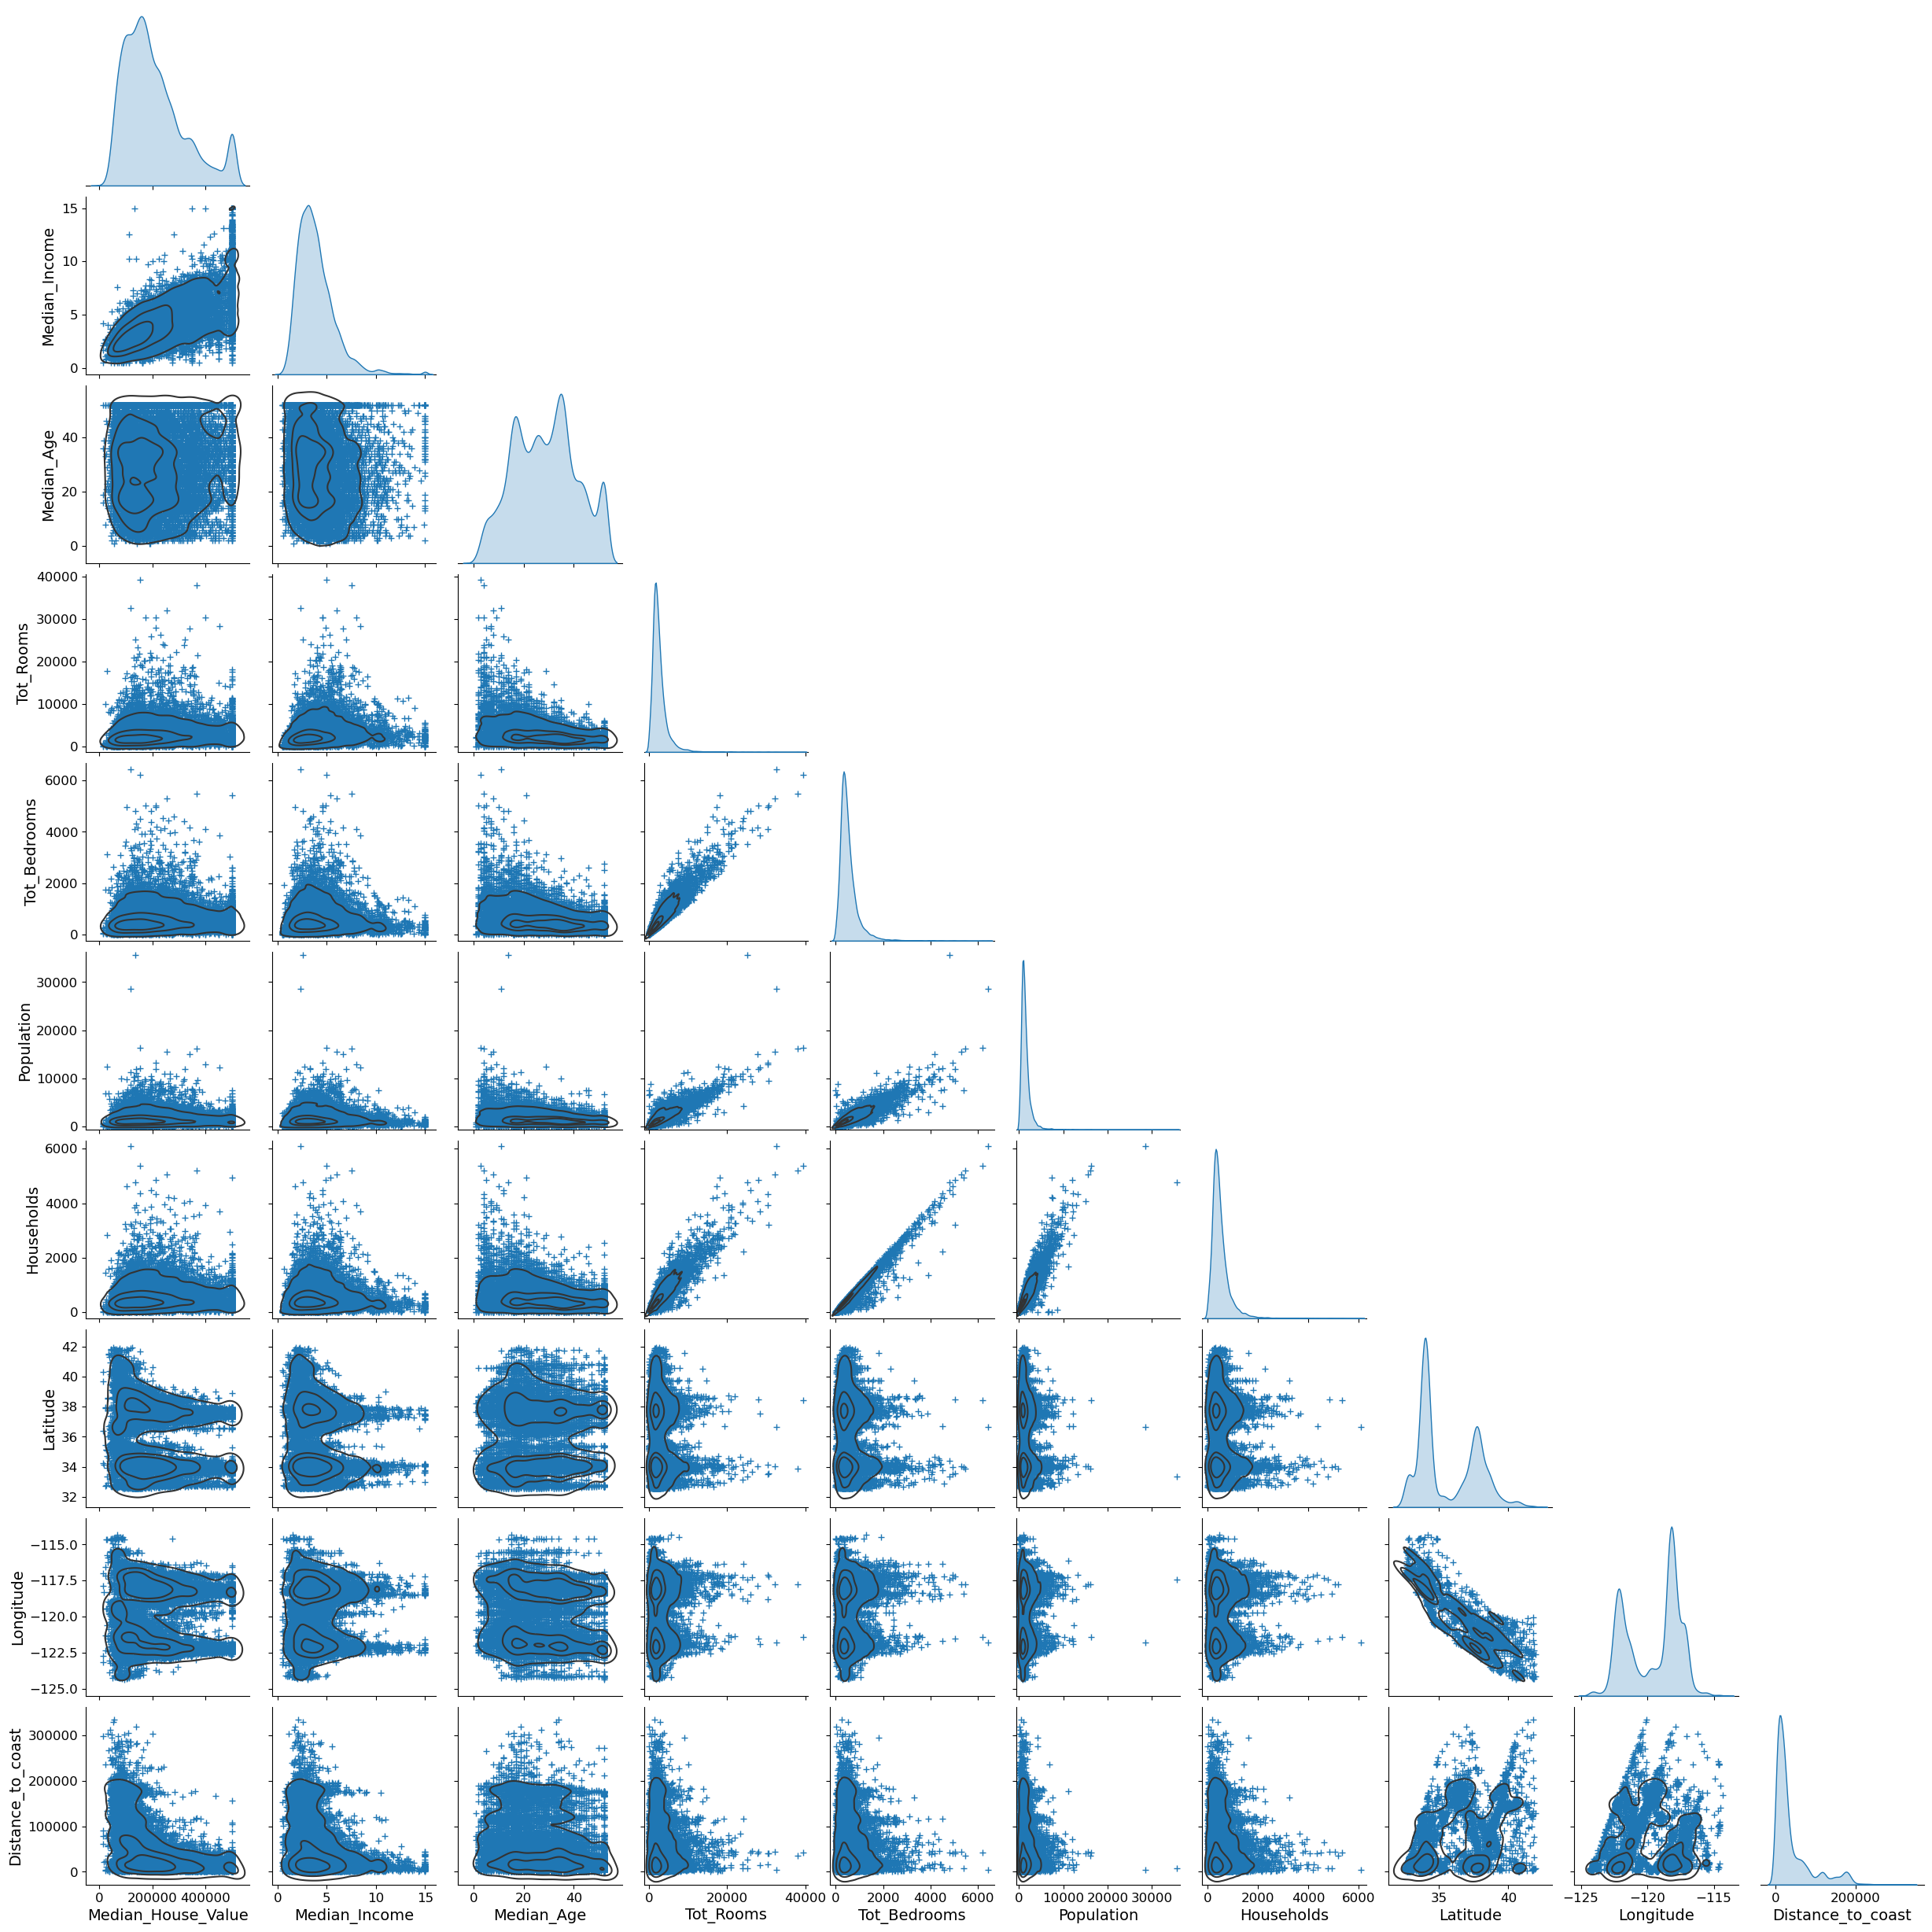

In [17]:
g = sns.pairplot(
    housing_num, 
    plot_kws=dict(marker="+", linewidth=1),
    diag_kind= 'kde',
    corner=True,
)
g.map_lower(sns.kdeplot, levels = 4, color = ".2")

In [18]:
# pd.plotting.scatter_matrix(housing_num, alpha = 0.2, figsize = (24, 24), diagonal='kde');

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Look more carefully into the distribution of the "median_income" column
Hint : you may wish to change the \<bins> parameter

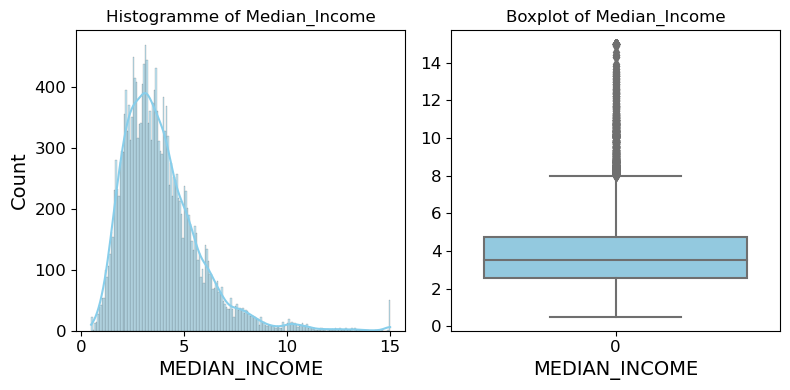

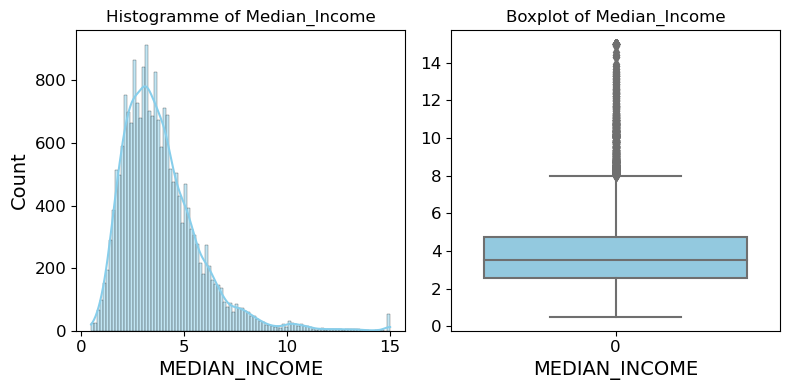

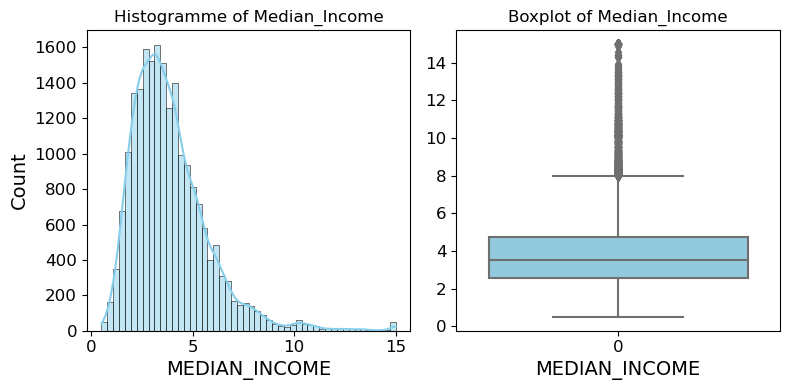

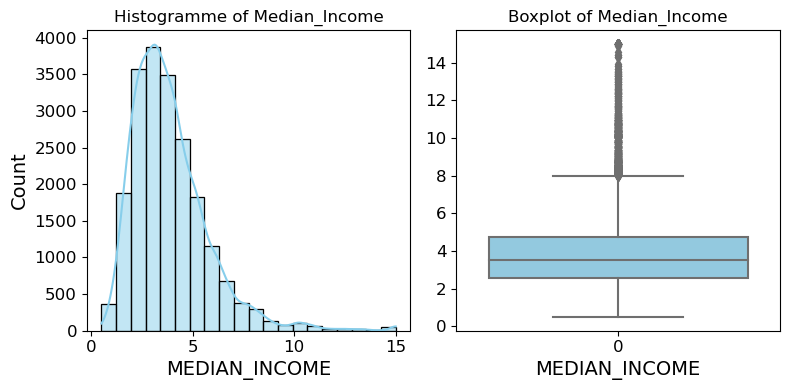

In [20]:
hist_box(housing['Median_Income'], 200)
hist_box(housing['Median_Income'], 100)
hist_box(housing['Median_Income'], 50)
hist_box(housing['Median_Income'], 20)

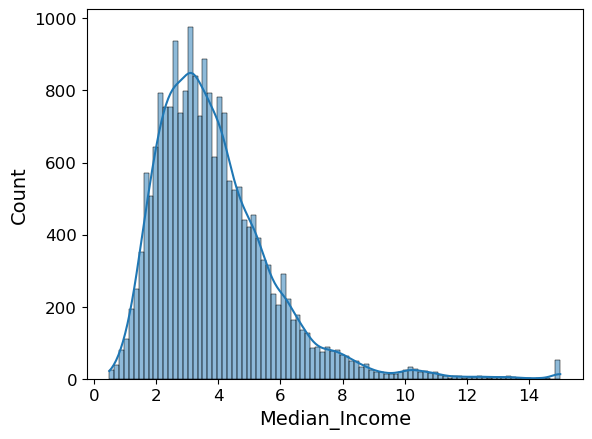

In [21]:
sns.histplot(housing['Median_Income'], kde = True);

In [22]:
housing.loc[housing['Median_Income'] > 14].describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast
count,57.000000,57.00000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.00000,57.000000
mean,489146.561404,14.94570,38.631579,2195.842105,264.122807,733.298246,251.526316,35.160526,-119.57193,13933.404904
std,53739.659085,0.17427,12.945810,1413.593860,175.377152,459.520751,166.136143,1.665089,1.87612,11473.009014
min,131300.000000,14.28670,2.000000,8.000000,1.000000,13.000000,1.000000,32.990000,-122.52000,1016.672627
25%,500001.000000,15.00010,32.000000,1371.000000,148.000000,414.000000,152.000000,34.070000,-121.96000,6042.888272
50%,500001.000000,15.00010,40.000000,2209.000000,261.000000,735.000000,247.000000,34.100000,-118.42000,10620.894804
75%,500001.000000,15.00010,52.000000,2907.000000,360.000000,956.000000,319.000000,37.400000,-118.33000,17257.043241
max,500001.000000,15.00010,52.000000,5586.000000,753.000000,1871.000000,697.000000,37.920000,-117.23000,43658.403542


In [23]:
housing.loc[housing['Median_House_Value'] > 499999].describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,500000.972782,7.718279,33.916331,2941.285282,503.134073,1110.717742,466.803427,35.235514,-119.714808,11622.834202
std,0.162799,3.270615,13.031440,2144.906809,395.642378,809.597160,359.277806,1.789526,1.954213,12189.661020
min,500000.000000,0.499900,2.000000,8.000000,1.000000,13.000000,1.000000,32.680000,-122.640000,421.084024
25%,500001.000000,5.112825,25.000000,1662.500000,268.750000,635.750000,253.000000,33.977500,-122.120000,3922.475382
50%,500001.000000,7.562450,34.000000,2501.000000,403.500000,925.500000,375.000000,34.130000,-118.480000,7903.433892
75%,500001.000000,10.074725,45.000000,3532.750000,610.500000,1338.750000,577.000000,37.402500,-118.320000,14901.749492
max,500001.000000,15.000100,52.000000,18132.000000,5419.000000,7431.000000,4930.000000,38.910000,-116.430000,156238.970441


In [24]:
np.median(housing['Median_Income'])

3.5347999999999997

In [25]:
np.median(housing.loc[housing['Median_Income'] > 11, 'Median_Income'])

13.014700000000001

### Explain the following lines of code

### *``Your answers here``*

In [26]:
cat=[np.min(housing["Median_Income"])]
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(housing["Median_Income"].quantile(i))
cat.append(np.max(housing["Median_Income"]))
print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


In [27]:
housing["income_cat"]=pd.cut(housing["Median_Income"], bins=cat, labels = [1,2,3,4,5], include_lowest=True)

In [28]:
housing

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_city,income_cat
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,SanFrancisco,5
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,SanFrancisco,5
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,SanFrancisco,5
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,SanFrancisco,5
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,SanFrancisco,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,SanFrancisco,1
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,SanFrancisco,2
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,SanFrancisco,1
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,SanFrancisco,1


In [29]:
housing["income_cat"].value_counts()

2    4131
1    4130
4    4128
5    4128
3    4123
Name: income_cat, dtype: int64

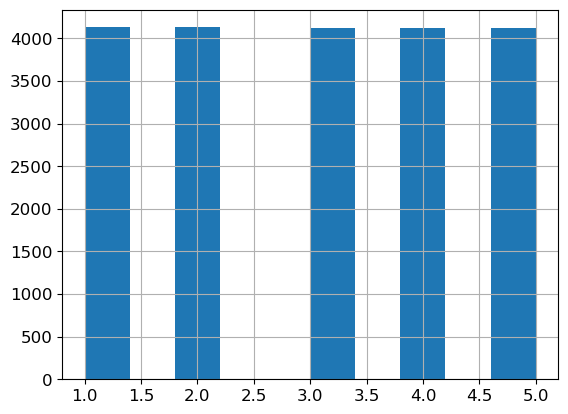

In [30]:
housing["income_cat"].hist();

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  category
 11  income_cat          20640 non-null  category
dtypes: category(2), float64(5), int64(5)
memory usage: 1.6 MB


### Create a Test Set through stratified random sampling on the income variable

**Why a test set ?** <br>
**Why stratify the data on the income variable before generating a test set ?** <br>
Hint : use a seed = 42 for the reproductibility of the (re)samplings

### *``Your answers here``*

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# df_y = housing['Median_House_Value']
# df_X = housing.drop(columns='Median_House_Value')

In [34]:
train_strat, test_strat = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

Now generate an equivalent random split without stratification

In [35]:
train_random, test_random = train_test_split(housing, test_size=0.2, random_state=42, stratify=None)

#### Explain precisely what each of the two following cells do.

### *``Your answers here``*

In [36]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(test_strat),
    "Random": income_cat_proportions(test_random),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [37]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.200097,0.200097,0.202762,1.331719,-1.421085e-14
2,0.200145,0.200097,0.203973,1.912370,-2.420721e-02
3,0.199758,0.199612,0.205184,2.716469,-7.276255e-02
4,0.200000,0.200097,0.198886,-0.557171,4.844961e-02
5,0.200000,0.200097,0.189196,-5.402132,4.844961e-02


**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [38]:
houses_df = train_strat.copy(deep=True)

### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

In [39]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  category
 11  income_cat          16512 non-null  category
dtypes: category(2), float64(5), int64(5)
memory usage: 1.4 MB


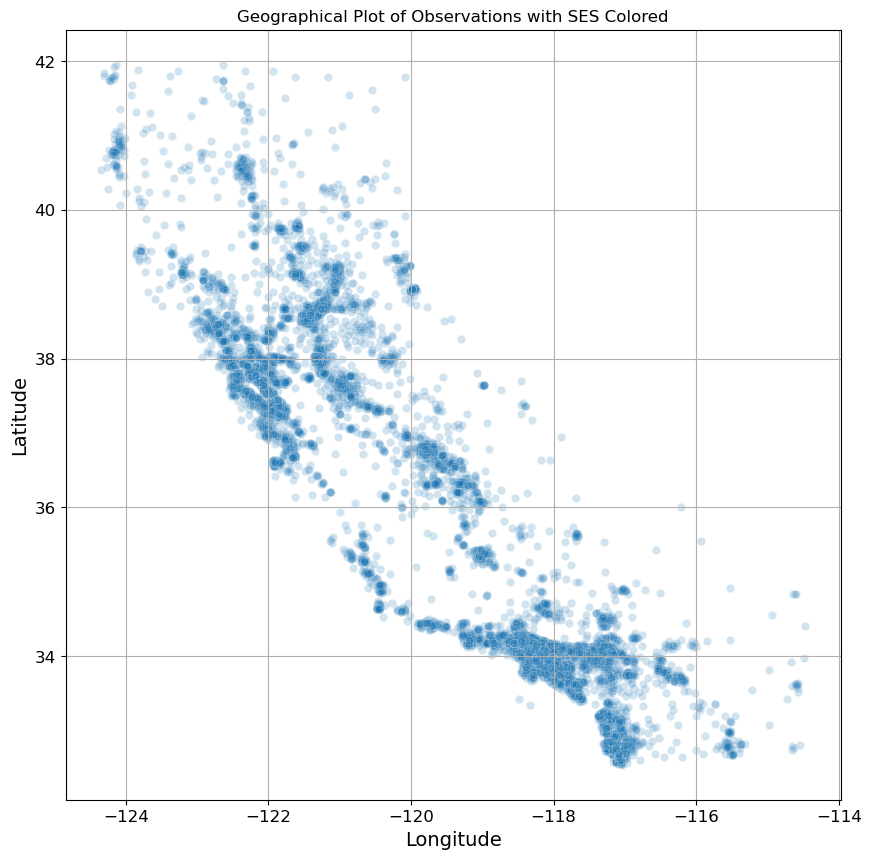

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=houses_df, x='Longitude', y='Latitude', alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Observations with SES Colored')
plt.grid(True)
plt.show()


### Geographic map of California houses values per district with population density

**Try to understand and comment on the following code**

### *``Your comments here``*

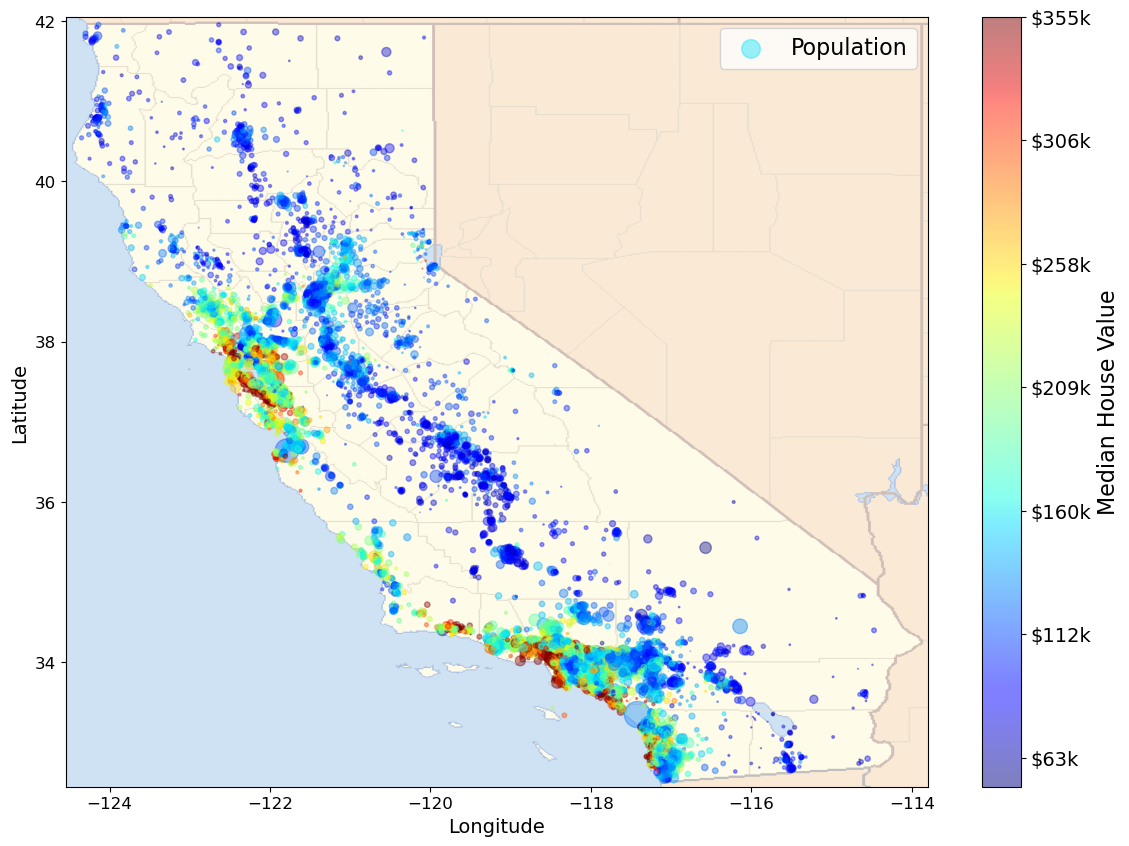

In [41]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
california_img=mpimg.imread("../images/california.png")
ax = houses_df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(14,10),
                       s=houses_df['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"),colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses_df["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Bivariate Analysis

**How are the different variables related to each other two by two ?**

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

In [42]:
houses_cor = houses_df.corr()

Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

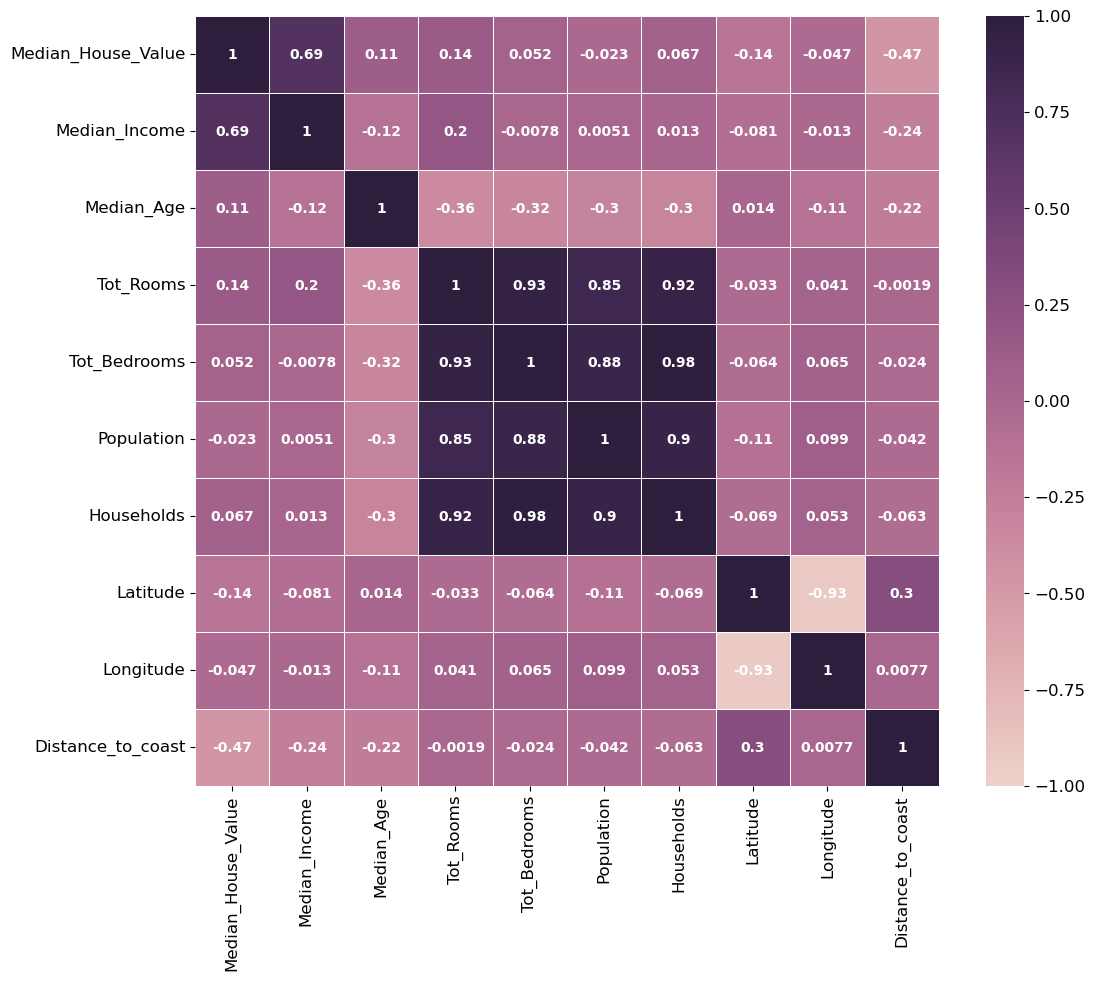

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(houses_cor, vmin=-1, vmax=1, annot=True, center = 0, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={'size':10,'weight':'bold', 'color':'white'}, linewidths=.7);

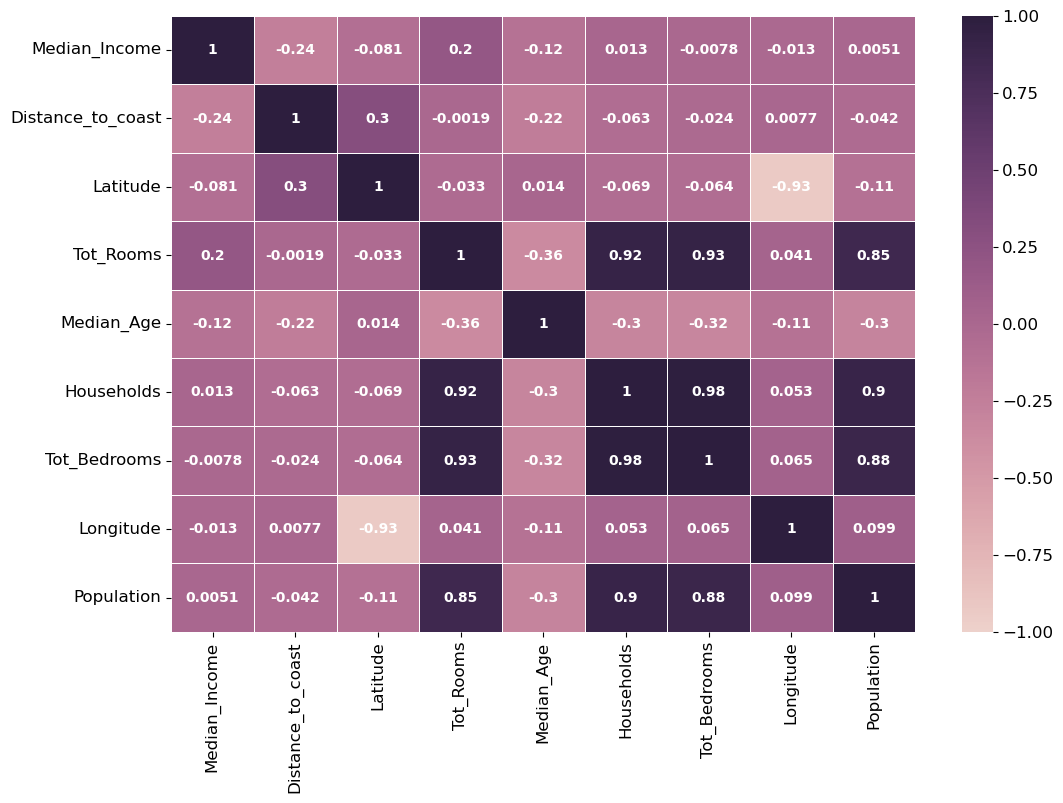

In [44]:

correlation_with_target = houses_cor['Median_House_Value'].drop('Median_House_Value') 

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

n = 10

top_correlation_vars = sorted_correlation.head(n)

subset_corr = houses_cor.loc[top_correlation_vars.index, top_correlation_vars.index]

plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr, vmin=-1, vmax=1, annot=True, center=0, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={'size': 10, 'weight': 'bold', 'color': 'white'}, linewidths=0.7)
plt.show()


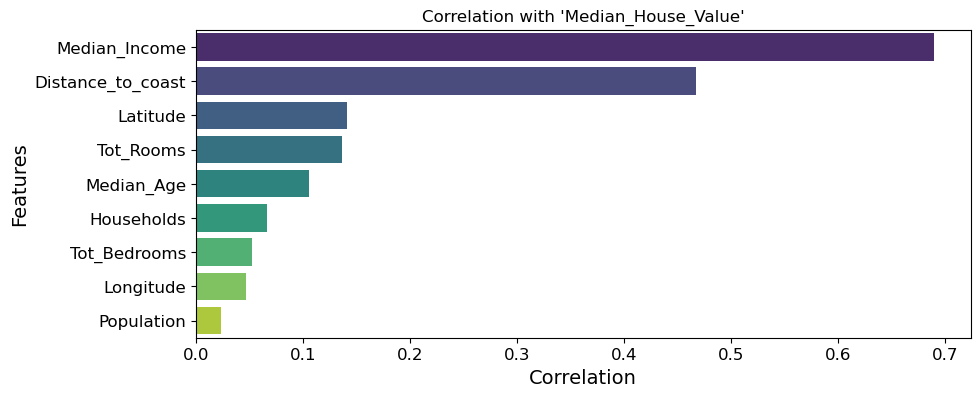

In [45]:
correlation_with_target = houses_cor['Median_House_Value'].drop('Median_House_Value')  # 删除'Median_House_Value'自身的相关性

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

corr_df = sorted_correlation.to_frame(name='Correlation')

plt.figure(figsize=(10, 4))

sns.barplot(x='Correlation', y=corr_df.index, data=corr_df, palette='viridis')

plt.title("Correlation with 'Median_House_Value'")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()


### *``Your comments here``*

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

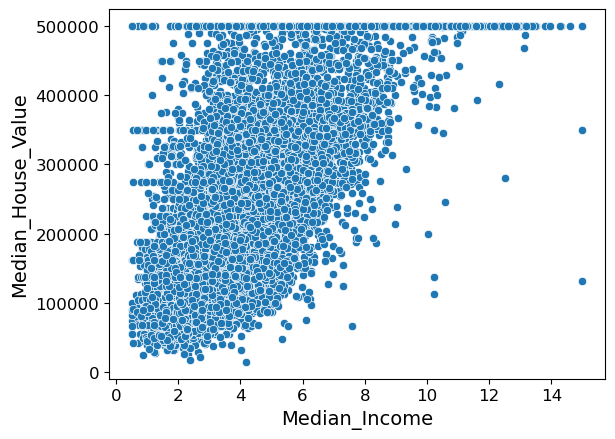

In [46]:
sns.scatterplot(x = 'Median_Income', y = 'Median_House_Value', data = houses_df);

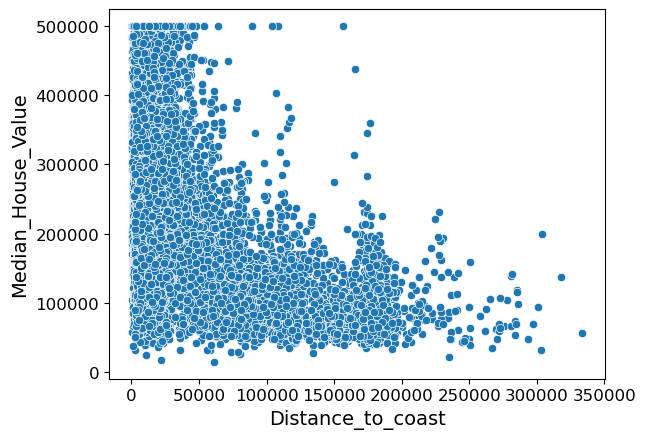

In [47]:
sns.scatterplot(x = 'Distance_to_coast', y = 'Median_House_Value', data = houses_df);

**What special observations are you drawing from these scatter plots?** <br>
Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

### *``Your answers here ----``*

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [48]:
def find_nearest_destination(row):
    room_per_house = row['Tot_Rooms'] / row['Households']
    bedroom_per_room = row['Tot_Bedrooms'] / row['Tot_Rooms']
    people_per_household = row['Population'] / row['Households']
    return round(room_per_house, 4), round(bedroom_per_room, 4), round(people_per_household, 4)

houses_df[['room_per_house', 'bedroom_per_room', 'people_per_household']]= houses_df.apply(find_nearest_destination, axis=1, result_type = 'expand')
display(houses_df)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_city,income_cat,room_per_house,bedroom_per_room,people_per_household
1405,182000.0,3.9816,10,7136,1691,2959,1507,37.96,-122.06,10235.180749,SanFrancisco,4,4.7352,0.2370,1.9635
17718,355300.0,7.2707,8,3088,474,1799,456,37.33,-121.77,31247.007622,SanJose,5,6.7719,0.1535,3.9452
19928,87700.0,3.6895,29,2409,436,1142,440,36.32,-119.32,173659.998787,SanJose,3,5.4750,0.1810,2.5955
13782,104600.0,1.3993,28,3009,698,1200,626,34.03,-117.05,87439.318166,LA,1,4.8067,0.2320,1.9169
18138,351500.0,5.2108,31,3344,620,1604,572,37.34,-122.00,16588.263207,SanJose,5,5.8462,0.1854,2.8042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18,6955,1882,2803,1740,38.58,-121.41,58281.418431,SanFrancisco,2,3.9971,0.2706,1.6109
9894,156100.0,2.6518,40,1739,318,744,312,38.29,-122.30,17440.080774,SanFrancisco,2,5.5737,0.1829,2.3846
19836,65000.0,2.7500,28,2201,429,1524,412,36.53,-119.40,182487.335025,SanJose,2,5.3422,0.1949,3.6990
18146,292900.0,7.2779,16,1156,198,455,216,37.35,-122.03,14704.872231,SanJose,5,5.3519,0.1713,2.1065


**Let us again look at the correlation between the predictors and the target**

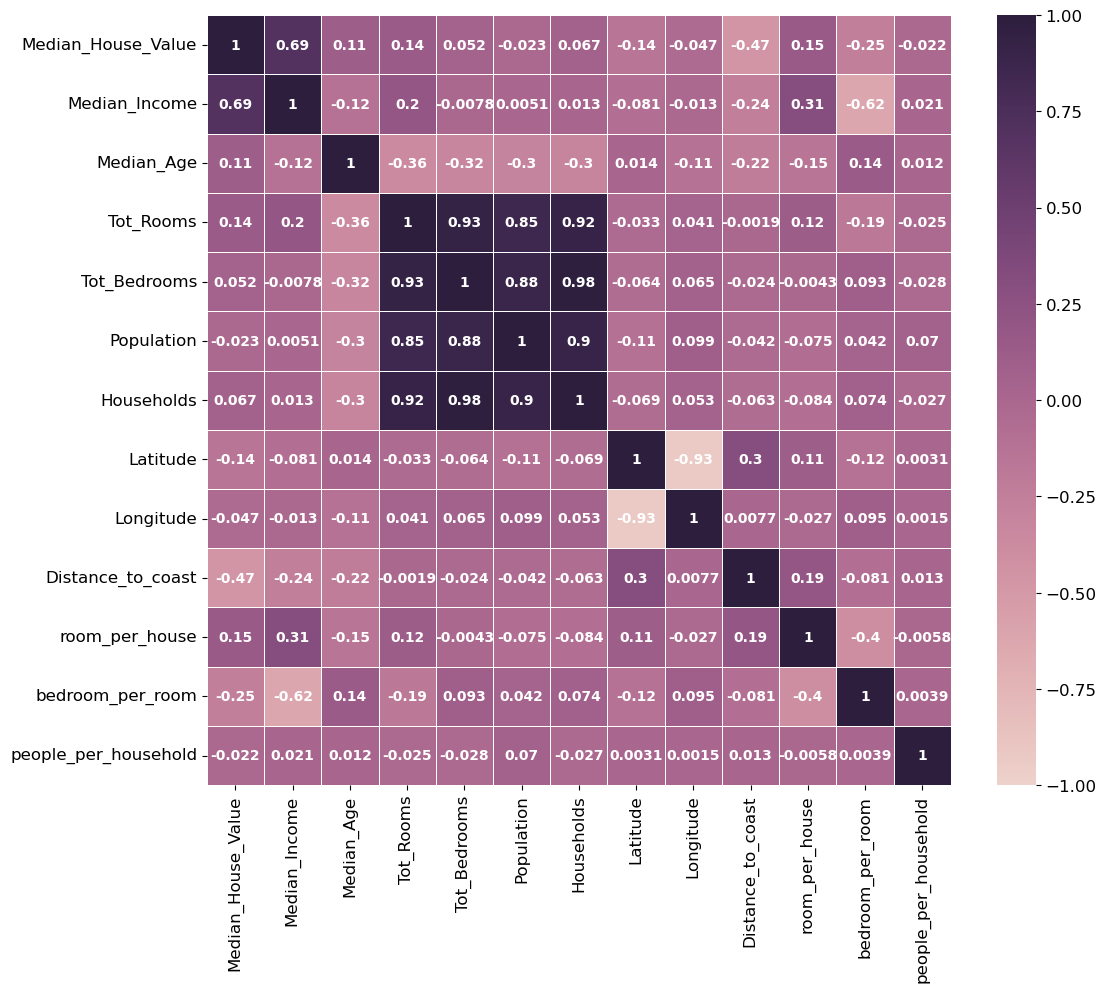

In [49]:
houses_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(houses_df.corr(), vmin=-1, vmax=1, annot=True, center = 0, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={'size':10,'weight':'bold', 'color':'white'}, linewidths=.7);

# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

### *``Comment on each of the following cells``*

In [50]:
## Your comment here ##

import random
random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [51]:
miss

array([19624, 15938, 17477, ..., 11819, 13609,  5299])

In [52]:
## Your comment here ##

houses_miss = houses_df.copy()

In [53]:
## Your comment here ##

houses_miss.loc[miss,"Tot_Bedrooms"] = np.nan

In [54]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          14950 non-null  float64 
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  category
 11  income_cat            16512 non-null  category
 12  room_per_house        16512 non-null  float64 
 13  bedroom_per_room      16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtype

**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [55]:
## Your comment here ##

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [56]:
## Your comment here ##

houses_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14950 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    14950 non-null  float64 
 1   Median_Income         14950 non-null  float64 
 2   Median_Age            14950 non-null  int64   
 3   Tot_Rooms             14950 non-null  int64   
 4   Tot_Bedrooms          14950 non-null  float64 
 5   Population            14950 non-null  int64   
 6   Households            14950 non-null  int64   
 7   Latitude              14950 non-null  float64 
 8   Longitude             14950 non-null  float64 
 9   Distance_to_coast     14950 non-null  float64 
 10  Closest_city          14950 non-null  category
 11  income_cat            14950 non-null  category
 12  room_per_house        14950 non-null  float64 
 13  bedroom_per_room      14950 non-null  float64 
 14  people_per_household  14950 non-null  float64 
dtype

In [57]:
## Your comment here ##

Bed_med = houses_miss["Tot_Bedrooms"].median()
houses_miss["Tot_Bedrooms"].fillna(Bed_med, inplace=True)

In [58]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  float64 
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  category
 11  income_cat            16512 non-null  category
 12  room_per_house        16512 non-null  float64 
 13  bedroom_per_room      16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtype

### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [59]:
def col_miss (df, col, max_miss):
    
    '''
    df : a pandas dataframe
    col : the name of the variable column
    max_miss : the maximum number of missing values
    returns a data frame with a random number of missing values on col
    '''
    
    import random
    random.seed(42)
    miss_indices = random.sample(df.index.tolist(), max_miss)
    df.loc[miss_indices, col] = np.nan
    
    return df
    


In [60]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  int64   
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  category
 11  income_cat            16512 non-null  category
 12  room_per_house        16512 non-null  float64 
 13  bedroom_per_room      16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtype

Generate some missing values in the first 10 predictors of \<housing_miss>

In [61]:
for col in range(10):
    col_name = housing_miss.columns[col]
    col_miss(housing_miss, col_name, 1651)

In [62]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    14861 non-null  float64 
 1   Median_Income         14861 non-null  float64 
 2   Median_Age            14861 non-null  float64 
 3   Tot_Rooms             14861 non-null  float64 
 4   Tot_Bedrooms          14861 non-null  float64 
 5   Population            14861 non-null  float64 
 6   Households            14861 non-null  float64 
 7   Latitude              14861 non-null  float64 
 8   Longitude             14861 non-null  float64 
 9   Distance_to_coast     14861 non-null  float64 
 10  Closest_city          16512 non-null  category
 11  income_cat            16512 non-null  category
 12  room_per_house        16512 non-null  float64 
 13  bedroom_per_room      16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtype

Now, he have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [63]:
housing_miss.isna().sum()

Median_House_Value      1651
Median_Income           1651
Median_Age              1651
Tot_Rooms               1651
Tot_Bedrooms            1651
Population              1651
Households              1651
Latitude                1651
Longitude               1651
Distance_to_coast       1651
Closest_city               0
income_cat                 0
room_per_house             0
bedroom_per_room           0
people_per_household       0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [64]:
# Start with simple imputer
from sklearn.impute import SimpleImputer

**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [65]:
housing_miss_cat = housing_miss.select_dtypes(exclude='number')
housing_miss_num = housing_miss.select_dtypes(include='number')

In [66]:
housing_miss_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Median_House_Value    14861 non-null  float64
 1   Median_Income         14861 non-null  float64
 2   Median_Age            14861 non-null  float64
 3   Tot_Rooms             14861 non-null  float64
 4   Tot_Bedrooms          14861 non-null  float64
 5   Population            14861 non-null  float64
 6   Households            14861 non-null  float64
 7   Latitude              14861 non-null  float64
 8   Longitude             14861 non-null  float64
 9   Distance_to_coast     14861 non-null  float64
 10  room_per_house        16512 non-null  float64
 11  bedroom_per_room      16512 non-null  float64
 12  people_per_household  16512 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [67]:
"""
Create a SimpleImputer with the strategy to use the mean

Fit the imputer to your DataFrame, this computes the mean for each column

Transform the DataFrame by replacing missing values with the mean

The result of the transformation is a NumPy array, so convert it back to a DataFrame

Now, housing_imputed_df contains the imputed data with missing values replaced by the mean
"""
housing_miss_simple = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(housing_miss_num), columns=housing_miss_num.columns)


In [68]:
# X_df = pd.DataFrame(X, columns=df.columns)
# X_df.info()

**Using KNNImputer, impute missing data in each variable**

In [69]:
from sklearn.impute import KNNImputer
housing_miss_knn = pd.DataFrame(KNNImputer().fit_transform(housing_miss_num), columns=housing_miss_num.columns)

In [70]:
# houses_miss_knn = pd.concat([houses_miss_knn, housing_miss_cat], axis=0)

### Which imputer is better : SimpleImputer or KNNImputer ?
Please give some arguments

In [71]:
def compare_df(df, df_impute):
    from sklearn.metrics import mean_squared_error as mse
    reg_error = []
    for col in df.columns:
        reg_error.append(mse(df[col],df_impute[col]))
    return reg_error

In [72]:
houses_df_cat = houses_df.select_dtypes(exclude=['number'])
houses_df_num = houses_df.select_dtypes(include=['number'])

In [73]:
mse_mean_simple = np.mean(compare_df(houses_df_num, housing_miss_simple))
mse_mean_simple

121790982.42180245

In [74]:
mse_mean_knn = np.mean(compare_df(houses_df_num, housing_miss_knn))
mse_mean_knn

105193372.41554673

### *``Your answers here``*

## 2.2 - Categorical variables...

In [75]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  int64   
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  category
 11  income_cat            16512 non-null  category
 12  room_per_house        16512 non-null  float64 
 13  bedroom_per_room      16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtype

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

### *``Your answers here``*

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, both categorical variables should be considered nominal**

### *So, what is one hot encoding ?*

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [76]:
# Let us select our categorical variables
# houses_cat = houses_df[["Closest_city","income_cat"]]
# houses_cat = houses_df.select_dtypes(include=['category'])
houses_cat = houses_df.select_dtypes(exclude=['number'])

In [77]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE
onehot = OHE(sparse=False)
houses_onehot = onehot.fit_transform(houses_cat)

"""When sparse=False, the encoded results are returned as a dense matrix. This means that each row contains all of the encoded features, whether they are zero or not. This is a good choice for categorizing features with relatively few unique categories, as it reduces memory usage and improves computational efficiency.
When sparse=True, the encoded results are returned as a sparse matrix. Sparse matrices store only the positions and values of non-zero elements and are therefore suitable for classification features with a large number of unique categories. This can save a lot of memory, but may reduce computational efficiency in some cases, as accessing the elements of a sparse matrix may be somewhat slower than a dense matrix."""

'When sparse=False, the encoded results are returned as a dense matrix. This means that each row contains all of the encoded features, whether they are zero or not. This is a good choice for categorizing features with relatively few unique categories, as it reduces memory usage and improves computational efficiency.\nWhen sparse=True, the encoded results are returned as a sparse matrix. Sparse matrices store only the positions and values of non-zero elements and are therefore suitable for classification features with a large number of unique categories. This can save a lot of memory, but may reduce computational efficiency in some cases, as accessing the elements of a sparse matrix may be somewhat slower than a dense matrix.'

In [78]:
houses_onehot

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [79]:
onehot.categories_

[array(['LA', 'SanDiego', 'SanFrancisco', 'SanJose'], dtype=object),
 array([1, 2, 3, 4, 5])]

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [81]:
# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  category
 11  income_cat          16512 non-null  category
dtypes: category(2), float64(5), int64(5)
memory usage: 1.9 MB


Let us start with a custom transformer to be used to add attributes


BaseEstimator:
BaseEstimator 是所有 scikit-learn 估算器（estimator）的基类。
它提供了一些基本的方法，如 get_params() 和 set_params()，这些方法用于获取和设置估算器的参数。
BaseEstimator 还提供了一个默认的 get_params() 方法，该方法返回估算器的参数名称和相应的值。这对于估算器的调参和超参数搜索很有用。
通过继承 BaseEstimator，你的自定义估算器将具有 scikit-learn 估算器的基本行为，包括参数设置和获取功能。

TransformerMixin:
TransformerMixin 是所有 scikit-learn 变换器（transformer）的基类。
它提供了一些用于数据变换的方法，如 fit() 和 transform()。
fit() 方法用于估计变换器的参数，通常在训练数据上进行。
transform() 方法用于对数据进行实际的变换。
通过继承 TransformerMixin，你的自定义变换器将具有 scikit-learn 变换器的基本变换功能，可以无缝地与其他 scikit-learn 估算器和变换器一起使用。


In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # Calculate the new attribut's value
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # column-wise concatenation
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [83]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
houses_plus = attr_adder.transform(housing_df.values)

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

In [84]:
# 封装 继承 多态

### *``Your answers here``*

In [84]:
# Check your answers...

houses_plus_df = pd.DataFrame(houses_plus,
                              columns=list(housing_df.columns)+["rooms_per_household", "population_per_household"],
                              index=housing_df.index)

houses_plus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Median_House_Value        16512 non-null  object
 1   Median_Income             16512 non-null  object
 2   Median_Age                16512 non-null  object
 3   Tot_Rooms                 16512 non-null  object
 4   Tot_Bedrooms              16512 non-null  object
 5   Population                16512 non-null  object
 6   Households                16512 non-null  object
 7   Latitude                  16512 non-null  object
 8   Longitude                 16512 non-null  object
 9   Distance_to_coast         16512 non-null  object
 10  Closest_city              16512 non-null  object
 11  income_cat                16512 non-null  object
 12  rooms_per_household       16512 non-null  object
 13  population_per_household  16512 non-null  object
dtypes: object(14)
memory

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [87]:
train = housing_miss[housing_miss.columns[0:12]]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  14861 non-null  float64 
 1   Median_Income       14861 non-null  float64 
 2   Median_Age          14861 non-null  float64 
 3   Tot_Rooms           14861 non-null  float64 
 4   Tot_Bedrooms        14861 non-null  float64 
 5   Population          14861 non-null  float64 
 6   Households          14861 non-null  float64 
 7   Latitude            14861 non-null  float64 
 8   Longitude           14861 non-null  float64 
 9   Distance_to_coast   14861 non-null  float64 
 10  Closest_city        16512 non-null  category
 11  income_cat          16512 non-null  category
dtypes: category(2), float64(10)
memory usage: 1.9 MB


In [88]:
quanti_features = list(train.columns[1:10])
cat_features = ["Closest_city","income_cat"]
train_quanti = train[quanti_features]

In [89]:
train_quanti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Median_Income      14861 non-null  float64
 1   Median_Age         14861 non-null  float64
 2   Tot_Rooms          14861 non-null  float64
 3   Tot_Bedrooms       14861 non-null  float64
 4   Population         14861 non-null  float64
 5   Households         14861 non-null  float64
 6   Latitude           14861 non-null  float64
 7   Longitude          14861 non-null  float64
 8   Distance_to_coast  14861 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # this will add 3 attributes
        ('std_scaler', StandardScaler()),
    ])

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

In [91]:
houses_quanti

array([[ 0.08272491, -1.56252146,  2.21151825, ...,  2.58770665,
         2.48430742, -0.09250282],
       [ 1.91948831, -1.73015529,  0.24486306, ..., -0.19684777,
        -0.16407273,  0.06854532],
       [-0.08039527,  0.02999988, -0.08501809, ..., -0.25744978,
        -0.17378954, -0.02405156],
       ...,
       [-0.16427289,  0.02999988, -0.21424988, ..., -0.19401816,
        -0.18482634, -0.0184536 ],
       [ 1.92350907, -1.05961999, -0.69376783, ..., -0.84350377,
        -0.78388194, -0.04934728],
       [ 0.87972978,  0.868169  , -0.37166003, ..., -0.56263416,
        -0.55740974, -0.02194294]])

#### Explain the previous cells of codes and what they aim to accomplish

### *``Your answers here``*

**How many features should we have at this step ?** 

In [93]:
## Justify your answer with a code here ##
len(quanti_features)

9

### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [94]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

houses_ready = full_pipeline.fit_transform(train)

In [95]:
houses_ready

array([[ 0.08272491, -1.56252146,  2.21151825, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.91948831, -1.73015529,  0.24486306, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08039527,  0.02999988, -0.08501809, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.16427289,  0.02999988, -0.21424988, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.92350907, -1.05961999, -0.69376783, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87972978,  0.868169  , -0.37166003, ...,  0.        ,
         0.        ,  1.        ]])

**How many features should we have at this step ? Explain !**

In [112]:
## Justify your answer with a code here ##
print(f"We should have {houses_ready.shape[1]} features in this step")
print(f"Because we have {len(quanti_features)} quantitative standardized features")
print(f"And we have had {len(cat_features)} categorical features, the we got {houses_onehot.shape[1]} dummies variables finally")
print(f"Furthermore we creat 3 new features")
print(f"And at last, in totally we got {len(quanti_features) + int(houses_onehot.shape[1]) + 3} features here.")

We should have 21 features in this step
Because we have 9 quantitative standardized features
And we have had 2 categorical features, the we got 9 dummies variables finally
Furthermore we creat 3 new features
And at last, in totally we got 21 features here.


# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [130]:
# Check size
train_strat['Median_House_Value'].shape[0] == houses_ready.shape[0]

True

In [131]:
# Check type
display(f"y is {type(train_strat['Median_House_Value'])}")
display(f"X is {type(houses_ready)}")

"y is <class 'pandas.core.series.Series'>"

"X is <class 'numpy.ndarray'>"

In [132]:
y = train_strat['Median_House_Value']
X = houses_ready

## 3.1 - Learning and evaluating with the training set only

#### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [136]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X, y)

# Check that this algorithm does not use OLS with matrix inversion
# solver = model_lr.solver
# print(f"Solver used by LinearRegression: {solver}")


LinearRegression()

Estimate performance with Mean Squared Error and Mean Absolute Error

In [145]:
quanti_features = list(test_strat.columns[1:10])
cat_features = ["Closest_city","income_cat"]

In [146]:
# from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

X_test = full_pipeline.fit_transform(test_strat.drop(columns='Median_House_Value'))
y_test = test_strat['Median_House_Value']

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [147]:
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [148]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 4756011949.242005
Mean Absolute Error (MAE): 50765.6945251938


#### Decision Tree Regression

In [149]:
from sklearn.tree import DecisionTreeRegressor
model_tr = DecisionTreeRegressor(random_state=42)
model_tr.fit(X, y)

DecisionTreeRegressor(random_state=42)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [150]:
y_pred = model_tr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [151]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 11850105778.732962
Mean Absolute Error (MAE): 69276.7435285494


#### Comment on these first results

### *``Your answers here``*

## 3.2 - Estimating the models with *cross validation*

**Explain what the following function accomplishes**

In [154]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### *``Your answers here``*

#### Linear Regression

In [155]:
lr = LinearRegression()

In [157]:
def cross_val(model, X, y):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse = np.sqrt(-scores)
    display_scores(rmse)

In [156]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv=10)
lr_rmse = np.sqrt(-lr_scores)
display_scores(lr_rmse)

Scores: [74428.73630192 71188.42635143 75812.89526164 75025.04978377
 73548.30026949 72820.62586372 74238.59764065 71140.52249922
 67909.80736116 68715.18013212]
Mean: 72482.81414651124
Standard deviation: 2534.8730179666322


#### Penalized Linear Regression (Elasticnet)

Penalized Linear Regression (Elasticnet)

In [159]:
from sklearn.linear_model import ElasticNet

In [160]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
cross_val(elastic_net, X, y)

Scores: [80645.36580695 77247.42065034 82668.1310892  82274.20328068
 78239.68035324 82341.09501955 82339.80411538 79136.03904501
 76385.47165744 75812.66721847]
Mean: 79708.98782362699
Standard deviation: 2546.2986322478614


#### Decision Trees

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
tree_reg = DecisionTreeRegressor()
cross_val(tree_reg, X, y)

Scores: [71600.88292385 69982.68828302 74924.36468354 73144.06366143
 67108.23934609 73806.73208294 74992.23996846 67733.75914664
 69154.95053151 68199.79521247]
Mean: 71064.7715839955
Standard deviation: 2867.5230885601923


***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

### *``Your answers here``*

#### Random Forests

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
cross_val(forest_reg, X, y)

Scores: [58522.24905542 55277.01997419 58877.31841142 55638.51007898
 53227.88138437 54342.05461262 55555.92941405 52741.51217569
 51971.66322004 51356.59096833]
Mean: 54751.07292951093
Standard deviation: 2423.489201674663


#### Support Vector Machines

In [165]:
from sklearn.svm import SVR

In [166]:
svm_reg = SVR(kernel="linear")
cross_val(svm_reg, X, y)

Scores: [110814.74524131 105309.29854123 112527.53043111 114312.86181153
 109094.86975273 113815.51359633 114223.00412022 109172.60559854
 107931.82148969 105915.67133099]
Mean: 110311.79219136706
Standard deviation: 3186.508849092045


## 3.3 - Tuning the model with Grid Search and Randomized Search

#### Example : Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_grid = {'n_estimators': [30,60,100], 'max_features': [8,10,15]}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example : ElasticNet

In [ ]:
en_grid = {'alpha': np.logspace(-3, 4, 10), 'l1_ratio':np.linspace(0,1,11) }

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cart_grid = {"min_samples_split": range(1,10),"min_samples_leaf": range(1,60)}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

## 3.4 - Final question : how good are our models in predicting unseen data ?

In [ ]:
# Start by checking the structure of the test set (code) #
## Your code here ##

### Prepare your test set to be evaluated on the tuned models

In [ ]:
# Now prepare our test set
## Your code here ##

In [ ]:
# Define your target (outcome) and your predictors #
## Your code here ##

#### Random Forest

In [ ]:
# Estimate the performance of your test set on the best cross-validated Random Forest model #

####################
## Your code here ##
####################

#### ElaticNet

In [ ]:
# Estimate the performance of your test set on the best cross-validated Elasticnet model #

####################
## Your code here ##
####################

#### Decision Tree

In [ ]:
# Estimate the performance of your test set on the best cross-validated Decision Tree model #

####################
## Your code here ##
####################

#### Linear Regression

In [ ]:
# Estimate the performance of your test set on the Linear Regression model #

####################
## Your code here ##
####################

### Machine Learning Conclusion
**In the light of all these information, what have your learned about :**
1. Overfitting
2. Tuning a learner
3. Model performance
4. Else ?
Please write a complete but synthetic essay on your learning experience

### <span style="color:blue">Full Homework to be submitted on session #7</span>